<a href="https://colab.research.google.com/github/chandan2294/Linear-Programming-/blob/main/Intro_to_Linear_Programming_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this set of notebook, we will be looking at some linear programming problems and how we can construct and solve these problems using the Python Linear Programming package PuLP.



1.   **What is Linear Programming?**
2.   **Introduction to PuLP**
3.   **Real World Problems using Linear Programming**
4.   **Resourcing Problem**
5.   **Blending Problem**



**What is Linear Programming?**

Imagine that you have a system of linear equations and inequalities. Such systems often have many possible solutions. Linear programming is a set of mathematical and computational tools that allows you to find a particular solution to this system that corresponds to the maximum or minimum of some other linear function.

Let's start with a simple example:

We want to find the maximum solution to:
$$ Z = 4x + 3y $$

This is known as our objective function. *x* and *y* in the above equation are our decision variables.

Our constraints are following:

$$ x \geq 0 $$
$$ y \geq 2 $$
$$ 2y \leq 25 - x $$
$$ 4y \geq 2x - 8 $$
$$ y \leq 2x - 5 $$

We will begin by graphing this problem.


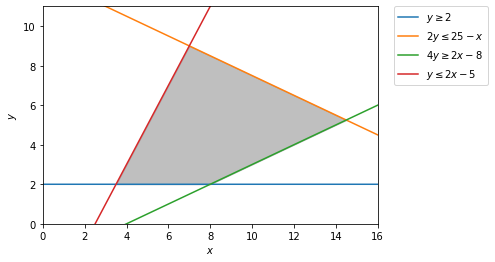

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Construct lines
x = np.linspace(0, 20, 2000) #x > 0

y1 = (x*0) + 2      #y >= 2
y2 = (25 - x)/2.0   #2y <= 25 - x
y3 = (2*x - 8)/4    #4y >= 2x - 8
y4 = (2*x - 5)      #y <= 2x - 5

#Make plot
plt.plot(x, y1, label = r'$y\geq2$')
plt.plot(x, y2, label = r'$2y\leq25-x$')
plt.plot(x, y3, label = r'$4y\geq 2x - 8$')
plt.plot(x, y4, label = r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where = y5>y6, color = 'grey', alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)

Our solution lies somewhere in the grey feasible region in the graph above.

It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 4 corners to our feasible region, so we can find the solutions for each corner to find our maximum. 

The four corners are between the lines:

| Line 1 | Line 2 |
| :-: | :-: |
| y $\geq$ 2 | 4y $\geq$ 2x - 8 |
| 2y $\leq$ 25 - x | y $\leq$ 2x - 5 |
| 2y $\leq$ 25 - x | 4y $\geq$ 2x - 8 |
| y $\geq$ 2 | y $\leq$ 2x - 5 |

So keeping in mind that:
$$ Z = 4x + 3y $$

We can calculate $Z$ for each corner:

1)

y $\geq$ 2 and 4y $\geq$ 2x - 8

2 = (2x - 8)/4

x = 8

y = 2

Z = 38

2)

2y $\leq$ 25 - x and y $\leq$ 2x - 5

(25 - x)/2 = (2x - 5)

x = 7

y = 9

Z = 55

3) 

2y $\leq$ 25 - x and 4y $\geq$ 2x - 8

(25 - x)/2 = (2x - 8)/4

x = 14.5

y = 5.25

Z = 73.75

4)

y $\geq$ 2 and y $\leq$ 2x - 5

2 = 2x - 5

x = 3.5

y = 2

Z = 20
  


We have successfully calculated that the maximum vaue for Z is 73.75, when x = 14.5 and y = 5.25.

This method of testing every vertex is only feasible for a small number of variables and constraints. As the numbers of constraints and variables increase, it becomes far more difficult to graph these problems and work out all the vertices. For instance, if we had a third variable:

Z = Ax + By + Cz

We would have to graph in three dimensions (x, y, and z).

Further, let's see how we can use Python and the PuLP package to solve linear programming problem, as well as more complex problems. 


**Introduction to PuLP**

[PuLP](http://pythonhosted.org/PuLP/) is an open source linear programming package for Python. PuLP can be installed using pip, instructions [here](hhttp://pythonhosted.org/PuLP/main/installing_pulp_at_home.html).

We will begin by importing PuLP

In [ ]:
pip install pulp

In [3]:
import pulp

Now instantiate a problem class. We will name it "My LP problem" and we are looking for an optimal maximum so we use LpMaximize

In [4]:
my_lp_problem = pulp.LpProblem("My_LP_Problem", pulp.LpMaximize)

Let's model our decision variables using the LpVariable class. In our example, x had a lower bound of 0 and y had a lower bound of 2.

Upper bounds can be assigned using the upBound parameter.

In [5]:
x = pulp.LpVariable('x', lowBound = 0, cat = 'Continuous')
y = pulp.LpVariable('y', lowBound = 2, cat = 'Continuous')

The objective function and constraints are added using the += operator to our model. 

The objective function is added first, then the individual constraints.


In [6]:
#Objective Function
my_lp_problem += 4*x + 3*y, "Z"

#Constraints
my_lp_problem += 2*y <= 25 - x
my_lp_problem += 4*y >= 2*x - 8
my_lp_problem += y <= 2*x - 5

We have now constructed our problem and can have a look at it.


In [7]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

PuLP supports open source linear programming solvers such as CBC and GLPK, as well as commercial solvers such as Gurobi and IBM's CPLEX.

The default solver is CBC, which comes packaged with PuLP upon installation.

For most applications, the open source CBC from [COIN-OR](http://www.coin-or.org/) will be enough for most simple linear programming optimization algorithms.

In [8]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

We have also checked the status of the solver, there are 5 status codes:



*   **Not Solved:** Status prior to solving the problem.
*   **Optimal:** An optimal solution has been found.
*   **Infeasible:** There are no feasible solutions (e.g. if you set the constraints x $\geq$ 1 and x $\geq$ 2).
*   **Unbounded:** The constraints are not bounded, maximizing the solution will tend towards infinity (e.g. if the only constraint was x $\geq$ 3).
*   **Undefined:** The optimal solution may exist but may not have been found.

We can now view our maximal variable values and the maximum values of Z.

We can use the VarValue method to retrieve the values of our variables x and y, and the pulp.value function to view the maximum value of the objective function.






In [9]:
for variable in my_lp_problem.variables():
  print("{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [10]:
print(pulp.value(my_lp_problem.objective))

73.75


Same result as we obtained above while solving manually. 



**Real World example using Linear Programming**

We will look at 2 real world examples:

*   Resourcing Problem
*   Blending Problem

**Resourcing Problem**

We are consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value. 

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available. 

The 2 cars need different time with each resource:



*   **Robot time:** Car A - 3 days; Car B - 4 days.
*   **Engineer Time:** Car A - 5 days; Car B - 6 days.
*   **Detailer Time:** Car A - 1.5 days; Car B - 3 days.

Car A provides \$30,0000 profit, while Car B offers \$45,000 profit. 

At the moment, they produce 4 of each cars per month, for \$300,000 profit. Not bad at all, but we think we can do better for them.

This can be modelled as follows:

Maximize: 
$$
Profit = 30,000A + 45,000B
$$

Subject to:
$$
A \geq 0
$$
$$
B \geq 0
$$
$$
3A + 4B \leq 30
$$
$$
5A + 6B \leq 60
$$
$$
1.5A + 3B \leq 21
$$

In [11]:
import pulp

#Instantiate our problem class
model = pulp.LpProblem("Profit_maximizing_problem", pulp.LpMaximize)

Unlike our previous problem, the decision variables in this case won't be continuous (We can't sell half a car!), so the category is integer. 

In [12]:
A = pulp.LpVariable("A", lowBound=0, cat='Integer')
B = pulp.LpVariable("B", lowBound=0, cat='Integer')

In [13]:
#Objective function
model += 30000*A + 45000*B, "Profit"

#Constraints
model += 3*A + 4*B <= 30
model += 5*A + 6*B <= 60
model += 1.5*A + 3*B <= 21

In [14]:
#Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [15]:
#Print our decision variable values
print("Production of Car A = {}".format(A.varValue))
print("Production of Car B = {}".format(B.varValue))

Production of Car A = 2.0
Production of Car B = 6.0


In [16]:
#Print our objective function value
print(pulp.value(model.objective))

330000.0


So that's \$330,000 monthly profit, compared to their original monthly profit of \$3000,000

By producing 2 cars of Car A and 4 cars of Car B, we bolster the profits at the factory by \$30,000 per month. 

We take our consultancy fee and leave the company with \$360,000 extra profit for the factory every year.

**Blending Problem**

We're going to make sausages!

We have the following ingredients available to us:

|Ingredient | Cost(\$/pounds) | Availability (pounds) |
| :-: | :-: | :-: |
| Pork | 4.32 | 30 |
| Wheat | 2.46 | 20 |
| Starch | 1.86 | 17 |

We will make 2 types of sausage:

*   Economy (> 40% Pork)
*   Premium (> 60% Pork)

One sausage is 50 ounces.

According to government regulations, the most starch we can use in our sausages is 25%.

We have a contract with a butcher, and have already purchased 23 pounds of pork, that will go bad if it's not used. 

We have a demand for 350 economy sausages and 500 premium sausages. We need to figure out how to most cost effectively blend our sausages. 

Let's model our problem

$p_e$ = Pork in the economy sausages (pounds)

$w_e$ = Wheat in the economy sausages (pounds)

$s_e$ = Starch in the economy sausages (pounds)

$p_p$ = Pork in the premium sausages (pounds)

$w_p$ = Wheat in the premium sausages (pounds)

$s_p$ = Starch in the premium sausages (pounds)

We want to minimize costs such that:

Cost = 0.72($p_e$ + $p_p$) + 0.41($w_e$ + $w_p$) + 0.31($s_e$ + $s_p$)

With the following constraints:

$p_e$ + $w_e$ + $s_e$ = 350 $\times$ 0.05

$p_p$ + $w_p$ + $s_p$ = 500 $\times$ 0.05

$p_e$ $\geq$ 0.4($p_e$ + $w_e$ + $s_e$)

$p_p$ $\geq$ 0.6($p_p$ + $w_p$ + $s_p$) 

$s_e$ $\leq$ 0.25($p_e$ + $w_e$ + $s_e$)

$s_p$ $\leq$ 0.25($p_p$ + $w_p$ + $s_p$)

$p_e$ + $p_p$ $\leq$ 30

$w_e$ + $w_p$ $\leq$ 20

$s_e$ + $s_p$ $\leq$ 17

$p_e$ + $p_p$ $\geq$ 23

In [17]:
import pulp

In [18]:
#Instantiate our problem class
model = pulp.LpProblem("Cost_minimizing_blending_problem", pulp.LpMinimize)

Here we have 6 decision variables, we could name them individually but this wouldn't scale up if we had hundreds/thousands of variables (you don't want to be entering all of these by hand multiple times).

We'll create a couple of lists from which we can create tuple indices.

In [19]:
#Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

Each of these decision variables will have similar characteristics (lower bound of 0, continuous variables). Therefore we can use PuLP's LpVariable object's dict functionality, we can provide our tuple indices.

These tuples will be keys for the ing_weight dict of decision variables.

In [20]:
ing_weight = pulp.LpVariable.dicts("weight kg", ((i, j) for i in sausage_types for j in ingredients), lowBound=0, cat='Continuous')


PuLP provides an lpSum vector calculation for the sum of a list of linear expressions.

Whilst we only have 6 decision variables, I will demonstrate how the problem would be constructed in a way that could be scaled up to many variables using list comprehensions.

In [21]:
#Objective Function
model += (pulp.lpSum([4.32*ing_weight[(i, 'pork')] + 2.46* ing_weight[(i, 'wheat')] + 1.86*ing_weight[(i,'starch')] for i in sausage_types]))

Now we add our constraints, bear in mind again here how the use of list comprehensions allows for scaling up to many ingredients or sausage types. 

In [22]:
#Constraints
#350 economy and 500 premium sausages at 0.05 
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350*0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500*0.05

#Economy has >= 40% pork, premium >= 60% pork
model += ing_weight['economy', 'pork'] >= (0.4*pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= (0.6*pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

#Sausages must be <= 25% starch
model += ing_weight['economy', 'starch'] <= (0.25*pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (0.25*pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

#We have at least 30 pounds of pork, 20 pounds of wheat and 17 pounds of starch available
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

#We have at least 23 pounds of pork to use up
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23


In [23]:
#Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [24]:
for var in ing_weight:
  var_value = ing_weight[var].varValue
  print("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 7.0 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 16.0 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of starch in premium sausages is 6.25 kg


In [25]:
total_cost = pulp.value(model.objective)
print("The total cost is ${} for 350 economy sausage and 500 premium sausages".format(round(total_cost, 2)))

The total cost is $140.96 for 350 economy sausage and 500 premium sausages
